In [168]:
import pandas as pd
import numpy as np
import random
import math
import operator
from math import sqrt
from random import shuffle
from decimal import Decimal
from sklearn.datasets import fetch_lfw_people
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from numpy import cov
from numpy.linalg import eig
import heapq

In [79]:
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape

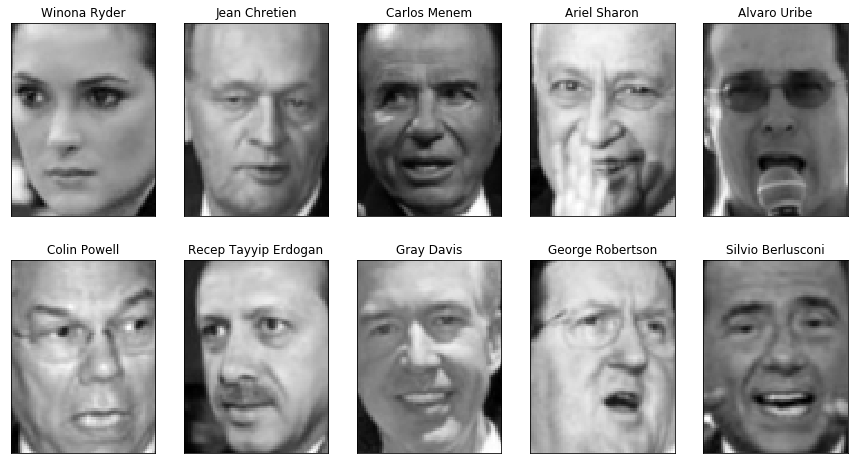

In [80]:
fig, axes = plt.subplots(2, 5, figsize = (15, 8), subplot_kw = {'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap=cm.gray)
    ax.set_title(people.target_names[target])

In [81]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [82]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name,count), end= '')
    if (i + 1)%3 == 0:
        print()

Alejandro Toledo           39Alvaro Uribe               35Amelie Mauresmo            21
Andre Agassi               36Angelina Jolie             20Ariel Sharon               77
Arnold Schwarzenegger      42Atal Bihari Vajpayee       24Bill Clinton               29
Carlos Menem               21Colin Powell              236David Beckham              31
Donald Rumsfeld           121George Robertson           22George W Bush             530
Gerhard Schroeder         109Gloria Macapagal Arroyo    44Gray Davis                 26
Guillermo Coria            30Hamid Karzai               22Hans Blix                  39
Hugo Chavez                71Igor Ivanov                20Jack Straw                 28
Jacques Chirac             52Jean Chretien              55Jennifer Aniston           21
Jennifer Capriati          42Jennifer Lopez             21Jeremy Greenstock          24
Jiang Zemin                20John Ashcroft              53John Negroponte            31
Jose Maria Aznar           23Jua

In [83]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people/255

In [122]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
print(X_train.shape)
print(y_train.shape)
#build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

y_train = np.reshape(y_train, (y_train.shape[0], 1))
X_train_y= np.append(X_train, y_train, axis=1 )
y_test= np.reshape(y_test, (y_test.shape[0], 1))
X_test_y= np.append(X_test, y_test, axis=1 )
print(X_train_y.shape)
print(X_test_y.shape)


(1547, 5655)
(1547,)
Test set score of 1-nn: 0.23
(1547, 5656)
(516, 5656)


In [218]:
def Distance(value1, value2):
    distance = 0
    #for i in range(len(value1)-1):
     #   distance += (value1[i] - value2[i])**2
    #return sqrt(distance)
    distance = np.linalg.norm(value1[:-1] - value2[:-1])
    return(distance)

#firstVal=X_train_y[0]
#for row in X_train_y:
#    distance = euclideanDistance(firstVal, row)
#    print(distance)

In [221]:
def nearestNeighbor(train, test_value, k):
    distances = list()
    for i_row in train:
        ##might have to replace with linalg.norm
        #dist = Distance(test_value, i_row)
        dist = np.linalg.norm (test_value[:-1] - i_row[:-1])
        distances.append((i_row, dist))
    #distances.sort(key=lambda tup: tup[1])
    distances.sort(key=operator.itemgetter(1))
    neighbors = list()
    for i in range(k):
        neighbors.append(distances[i][0])
    return neighbors

#neighbors = nearestNeighbor(X_train_y, X_train_y[0], 1)
#for x in neighbors:
#    print(x)

In [222]:
def predict(train, test_value, k):
    Neighbor = nearestNeighbor(train, test_value, k)
    check_vals = [i[-1] for i in Neighbor]
    pred = max(set(check_vals), key=check_vals.count)
    return pred

correct_prediction = 0
length = 0
for row in X_test_y:
    prediction = predict(X_train_y, row, 1)
    print("Expected %d, Got %d"%(row[-1],prediction))
    length += 1
    if row[-1] == prediction:
        correct_prediction += 1

print("Accuracy:%f"%(correct_prediction/length))

Expected 25, Got 9
Expected 28, Got 61
Expected 28, Got 28
Expected 57, Got 57
Expected 33, Got 24
Expected 24, Got 15
Expected 12, Got 59
Expected 1, Got 58
Expected 37, Got 37
Expected 35, Got 35
Expected 31, Got 11
Expected 41, Got 41
Expected 10, Got 10
Expected 39, Got 31
Expected 52, Got 58
Expected 39, Got 34
Expected 6, Got 57
Expected 24, Got 14
Expected 16, Got 16
Expected 14, Got 48
Expected 55, Got 38
Expected 13, Got 16
Expected 11, Got 5
Expected 21, Got 50
Expected 14, Got 51
Expected 35, Got 35
Expected 17, Got 12
Expected 31, Got 31
Expected 43, Got 24
Expected 53, Got 36
Expected 34, Got 49
Expected 8, Got 8
Expected 13, Got 56
Expected 46, Got 22
Expected 15, Got 24
Expected 35, Got 35
Expected 43, Got 60
Expected 21, Got 6
Expected 18, Got 0
Expected 36, Got 10
Expected 18, Got 11
Expected 31, Got 31
Expected 52, Got 52
Expected 29, Got 45
Expected 25, Got 49
Expected 37, Got 37
Expected 59, Got 49
Expected 38, Got 38
Expected 22, Got 48
Expected 16, Got 42
Expected

Expected 12, Got 12
Expected 2, Got 14
Expected 32, Got 8
Expected 37, Got 35
Expected 43, Got 14
Expected 0, Got 50
Expected 38, Got 3
Expected 31, Got 12
Expected 7, Got 49
Expected 16, Got 6
Expected 24, Got 24
Expected 38, Got 38
Expected 9, Got 0
Expected 10, Got 11
Expected 4, Got 35
Expected 9, Got 32
Expected 57, Got 22
Expected 49, Got 31
Expected 37, Got 42
Expected 30, Got 22
Expected 29, Got 54
Expected 0, Got 0
Expected 45, Got 15
Expected 12, Got 12
Expected 2, Got 54
Expected 11, Got 6
Expected 48, Got 60
Expected 38, Got 11
Expected 27, Got 50
Expected 53, Got 55
Expected 48, Got 58
Expected 23, Got 10
Expected 52, Got 28
Expected 18, Got 18
Expected 54, Got 31
Expected 46, Got 53
Expected 6, Got 56
Expected 61, Got 4
Expected 29, Got 54
Expected 45, Got 49
Expected 44, Got 11
Expected 15, Got 58
Expected 49, Got 49
Expected 50, Got 32
Expected 40, Got 11
Expected 48, Got 9
Expected 16, Got 60
Expected 25, Got 25
Expected 34, Got 38
Expected 16, Got 16
Expected 5, Got 8

In [ ]:
#def accuracy_metric(actual, predicted):
#    correct = 0
#    for i in range(len(actual)):
#        if actual[i] == predicted[i]:
#            correct += 1
#    return correct / float(len(actual)) * 100.0

#accuracy = accuracy_metric(actual, predicted)

In [228]:
X_mean = X_train.mean(axis=0)
#print(X_mean)
X_std = X_train.std(axis=0)
#print(X_std)
#print(X.T)
X_train_std = np.asarray([(X_train.T[i]-X_mean[i])/X_std[i] for i in range(X_train.T.shape[0])]).T
print(X_train_std.shape)

(1547, 5655)


In [169]:
normalized_eig_vectors = preprocessing.normalize(eig_vectors)
print(normalized_eig_vectors.shape)

(5655, 5655)


In [154]:
#X_cov = cov(X_train_std)
X_cov = cov(X_train_std.T)
eig_values, eig_vectors = eig(X_cov)
eig_values = np.real(eig_values)
eig_vectors = np.real(eig_vectors)
print(eig_values)
print(eig_vectors.shape)
reduced_vector = eig_vectors[:,0:100]
print(reduced_vector.shape)

[ 1.50193718e+03  6.20878816e+02  4.37304442e+02 ... -3.66575701e-17
  9.78900654e-17  2.28382180e-16]
(5655, 5655)
(5655, 100)


In [160]:

print(X_train.shape)
projected_vector_100D = reduced_vector.T.dot(X_train.T)
print(projected_vector_100D.T.shape)
print(y_train.shape)
projected_append_y= np.append(projected_vector_100D.T, y_train, axis=1 )
print(projected_append_y.shape)
print(X_train.shape)
projected_vector_test = reduced_vector.T.dot(X_test.T)
print(projected_vector_test.T.shape)
projected_test_append_y= np.append(projected_vector_test.T, y_test, axis=1 )
print(projected_test_append_y.shape)

(1547, 5655)
(1547, 100)
(1547, 1)
(1547, 101)
(1547, 5655)
(516, 100)
(516, 101)


In [163]:

#build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(projected_vector_100D.T, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(projected_vector_test.T, y_test)))

Test set score of 1-nn: 0.24


C:\Users\siciit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(X_train.shape)
projected_vector_test = eig_vectors.T.dot(X_test.T)
print(projected_vector_test.T.shape)
projected_vector_train = eig_vectors.T.dot(X_train.T)
print(projected_vector_train.T.shape)

In [161]:
correct_prediction = 0
length = 0
for row in projected_test_append_y:
    prediction = predict(projected_append_y, row, 1)
    print("Expected %d, Got %d"%(row[-1],prediction))
    length += 1
    if row[-1] == prediction:
        correct_prediction += 1

print("Accuracy:%f"%(correct_prediction/length))

Expected 25, Got 9
Expected 28, Got 61
Expected 28, Got 28
Expected 57, Got 48
Expected 33, Got 24
Expected 24, Got 32
Expected 12, Got 59
Expected 1, Got 30
Expected 37, Got 37
Expected 35, Got 35
Expected 31, Got 11
Expected 41, Got 41
Expected 10, Got 10
Expected 39, Got 31
Expected 52, Got 58
Expected 39, Got 0
Expected 6, Got 57
Expected 24, Got 24
Expected 16, Got 16
Expected 14, Got 11
Expected 55, Got 38
Expected 13, Got 16
Expected 11, Got 21
Expected 21, Got 10
Expected 14, Got 51
Expected 35, Got 35
Expected 17, Got 19
Expected 31, Got 31
Expected 43, Got 24
Expected 53, Got 36
Expected 34, Got 49
Expected 8, Got 8
Expected 13, Got 13
Expected 46, Got 58
Expected 15, Got 24
Expected 35, Got 35
Expected 43, Got 60
Expected 21, Got 6
Expected 18, Got 16
Expected 36, Got 10
Expected 18, Got 39
Expected 31, Got 31
Expected 52, Got 52
Expected 29, Got 45
Expected 25, Got 49
Expected 37, Got 37
Expected 59, Got 49
Expected 38, Got 38
Expected 22, Got 48
Expected 16, Got 42
Expecte

Expected 59, Got 59
Expected 50, Got 6
Expected 10, Got 31
Expected 42, Got 42
Expected 37, Got 37
Expected 12, Got 32
Expected 31, Got 10
Expected 12, Got 12
Expected 2, Got 14
Expected 32, Got 8
Expected 37, Got 10
Expected 43, Got 14
Expected 0, Got 50
Expected 38, Got 16
Expected 31, Got 12
Expected 7, Got 49
Expected 16, Got 6
Expected 24, Got 24
Expected 38, Got 38
Expected 9, Got 12
Expected 10, Got 10
Expected 4, Got 31
Expected 9, Got 32
Expected 57, Got 12
Expected 49, Got 60
Expected 37, Got 59
Expected 30, Got 32
Expected 29, Got 40
Expected 0, Got 0
Expected 45, Got 15
Expected 12, Got 12
Expected 2, Got 14
Expected 11, Got 6
Expected 48, Got 12
Expected 38, Got 10
Expected 27, Got 50
Expected 53, Got 55
Expected 48, Got 22
Expected 23, Got 10
Expected 52, Got 28
Expected 18, Got 18
Expected 54, Got 31
Expected 46, Got 53
Expected 6, Got 11
Expected 61, Got 4
Expected 29, Got 54
Expected 45, Got 49
Expected 44, Got 11
Expected 15, Got 58
Expected 49, Got 49
Expected 50, Go

In [199]:
reduced_vector = eig_values[0:100]
#D = np.diag(1/np.sqrt(reduced_vector))
#D = (1/np.sqrt(reduced_vector))
#print(D.shape)
#White = np.dot(normalized_eig_vectors.T, D)
#print(White.shape)
#projected_Xtrain_whiten = X_train_std.dot(White[:,0:100])
projected_Xtrain_whiten = X_train_std.dot(normalized_eig_vectors[:,0:100])

projected_Xtrain_whiten = projected_Xtrain_whiten/(np.sqrt(reduced_vector + 1e-5))
print(projected_Xtrain_whiten.shape)

(1547, 100)


In [216]:
####whiten data 
#reduced_vector = eig_values[0:100]
#D = np.diag(1/np.sqrt(reduced_vector))
#White = np.dot(np.dot(normalized_eig_vectors[:,0:100], D), normalized_eig_vectors[:,0:100].T)
#projected_Xtrain_whiten = X_train_std.dot(White)

projected_append_y_white= np.append(projected_Xtrain_whiten, y_train, axis=1 )
print(projected_append_y_white.shape)

correct_prediction_1 = 0
length_1 = 0
for row in projected_test_append_y:
    prediction = predict(projected_append_y_white, row, 1)
    print("Expected %d, Got %d"%(row[-1],prediction))
    length_1 += 1
    if row[-1] == prediction:
        correct_prediction_1 += 1

print("Accuracy:%f"%(correct_prediction_1/length_1))

(1547, 101)
Expected 25, Got 25
Expected 28, Got 24
Expected 28, Got 25
Expected 57, Got 58
Expected 33, Got 35
Expected 24, Got 22
Expected 12, Got 12
Expected 1, Got 0
Expected 37, Got 37
Expected 35, Got 35
Expected 31, Got 31
Expected 41, Got 43
Expected 10, Got 12
Expected 39, Got 43
Expected 52, Got 58
Expected 39, Got 37
Expected 6, Got 12
Expected 24, Got 25
Expected 16, Got 13
Expected 14, Got 12
Expected 55, Got 58
Expected 13, Got 12
Expected 11, Got 12
Expected 21, Got 21
Expected 14, Got 12
Expected 35, Got 35
Expected 17, Got 12
Expected 31, Got 31
Expected 43, Got 43
Expected 53, Got 58
Expected 34, Got 35
Expected 8, Got 12
Expected 13, Got 12
Expected 46, Got 44
Expected 15, Got 12
Expected 35, Got 35
Expected 43, Got 43
Expected 21, Got 21
Expected 18, Got 13
Expected 36, Got 31
Expected 18, Got 12
Expected 31, Got 32
Expected 52, Got 58
Expected 29, Got 25
Expected 25, Got 25
Expected 37, Got 37
Expected 59, Got 58
Expected 38, Got 35
Expected 22, Got 22
Expected 16,

Expected 2, Got 0
Expected 32, Got 35
Expected 37, Got 37
Expected 43, Got 43
Expected 0, Got 0
Expected 38, Got 43
Expected 31, Got 35
Expected 7, Got 12
Expected 16, Got 12
Expected 24, Got 25
Expected 38, Got 43
Expected 9, Got 12
Expected 10, Got 12
Expected 4, Got 12
Expected 9, Got 12
Expected 57, Got 58
Expected 49, Got 43
Expected 37, Got 37
Expected 30, Got 32
Expected 29, Got 25
Expected 0, Got 0
Expected 45, Got 43
Expected 12, Got 12
Expected 2, Got 0
Expected 11, Got 12
Expected 48, Got 43
Expected 38, Got 37
Expected 27, Got 25
Expected 53, Got 56
Expected 48, Got 44
Expected 23, Got 21
Expected 52, Got 50
Expected 18, Got 12
Expected 54, Got 58
Expected 46, Got 43
Expected 6, Got 12
Expected 61, Got 58
Expected 29, Got 31
Expected 45, Got 43
Expected 44, Got 44
Expected 15, Got 12
Expected 49, Got 43
Expected 50, Got 43
Expected 40, Got 37
Expected 48, Got 43
Expected 16, Got 12
Expected 25, Got 25
Expected 34, Got 35
Expected 16, Got 12
Expected 5, Got 12
Expected 14, G

[0, 1]
(5655, 2)
(1547, 2)


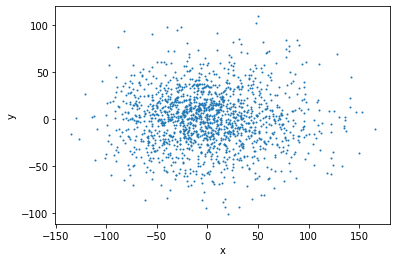

In [170]:
##2D data
###find max and min image: revisit and check

print(heapq.nlargest(2, range(len(eig_values)), key=eig_values.__getitem__))
D_eig_vector = normalized_eig_vectors[:,0:2]
print(D_eig_vector.shape)


projected_D_train = X_train_std.dot(D_eig_vector)
print(projected_D_train.shape)
plt.scatter(projected_D_train[:,0],projected_D_train[:,1], s =1)
#colors = (0,0,0)
#area = np.pi*3
#plt.scatter(projected_D_train[:,1], projected_D_train[:,0], s=area, c=colors, alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.show()